In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#sns.set_style('whitegrid')

**Check the head of customers, and check out its info() and describe() methods.**

In [3]:
df = pd.read_csv('Salary_Data.csv')
df.head(20)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
YearsExperience,30.0,5.313333,2.837888,1.1,3.20,4.7,7.70,10.5
Salary,30.0,76003.000000,27414.429785,37731.0,56720.75,65237.0,100544.75,122391.0


## Exploratory Data Analysis

**Let's explore the data!**

For the rest of the exercise we'll only be using the numerical data of the csv file.
___
**Use seaborn to create a jointplot to compare the Delivery Time and Sorting Time columns. Does the correlation make sense?**

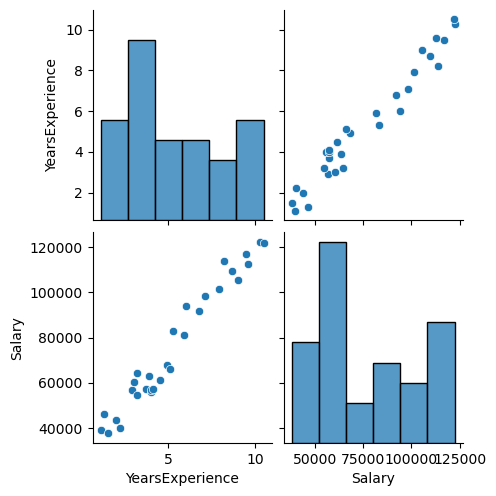

In [6]:
sns.pairplot(df)

In [7]:
df1=df.rename({'YearsExperience':'EXP', 'Salary':'SAL'},axis=1)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EXP', ylabel='Density'>

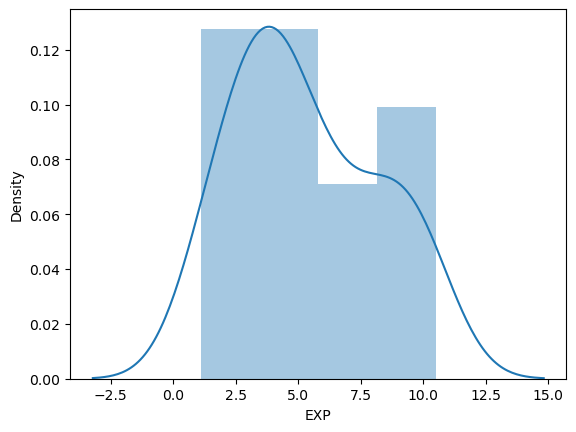

In [8]:
sns.distplot(df1['EXP'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SAL', ylabel='Density'>

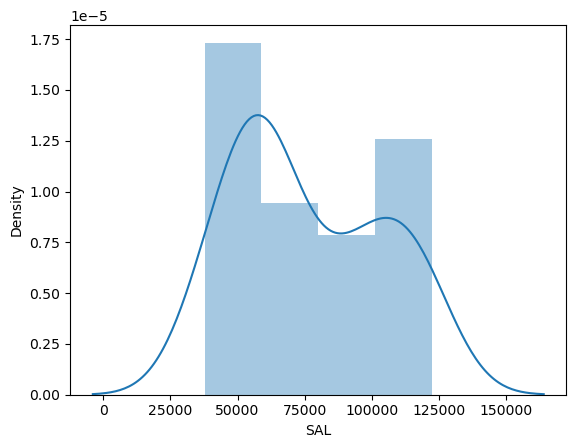

In [9]:
sns.distplot(df1['SAL'])

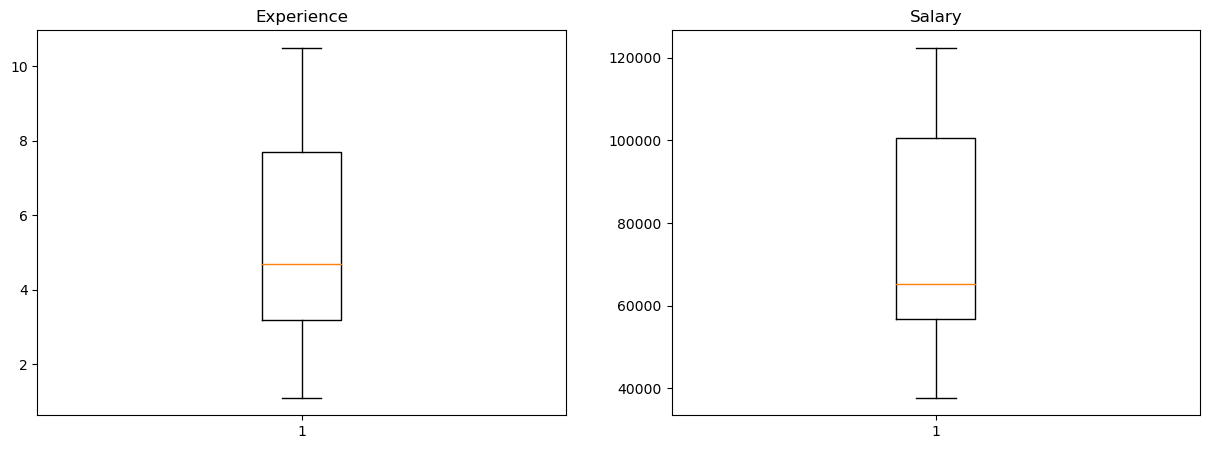

In [10]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.boxplot(df1['EXP'])
plt.title("Experience")
plt.subplot(1,2,2)
plt.boxplot(df1['SAL'])
plt.title("Salary")
plt.show()


Text(0.5, 1.0, 'Boxplot')

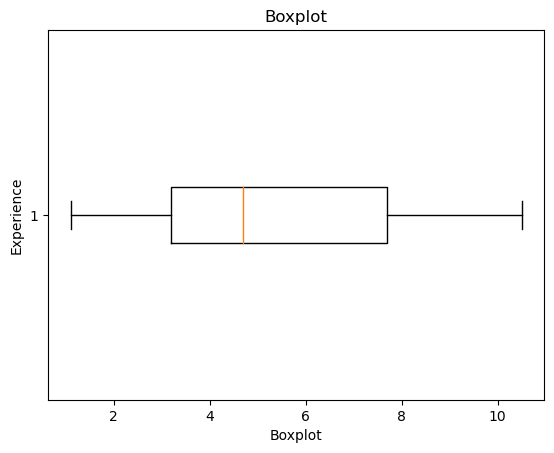

In [11]:
# vertical Boxplot
plt.boxplot(df1['EXP'],vert=False)
plt.ylabel("Experience")
plt.xlabel("Boxplot")
plt.title("Boxplot")

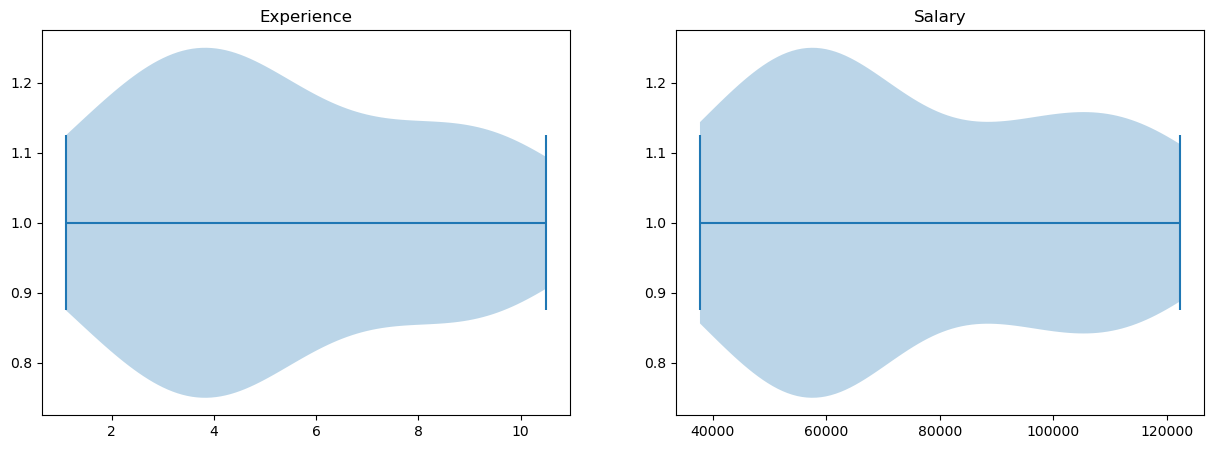

In [12]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.violinplot(df1['EXP'],vert=False)
plt.title("Experience")
plt.subplot(1,2,2)
plt.violinplot(df1['SAL'],vert=False)
plt.title("Salary")
plt.show()

In [13]:
df1.corr().style.background_gradient(cmap='coolwarm')

,EXP,SAL
EXP,1.000000,0.978242
SAL,0.978242,1.000000


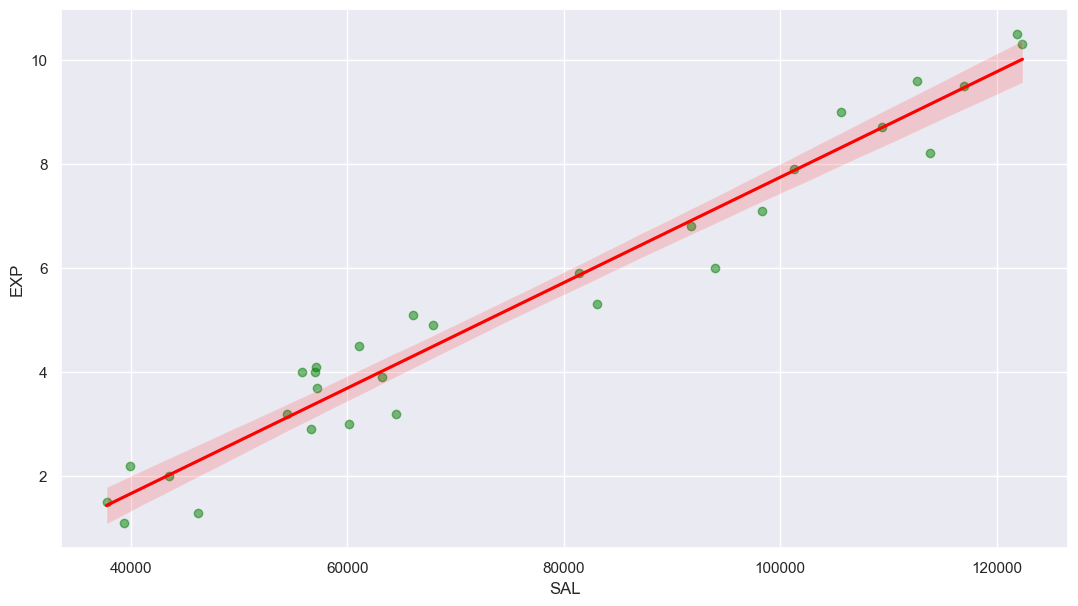

In [14]:
sns.set(style="darkgrid")
plt.figure(figsize=(13,7))
sns.regplot(x="SAL", y="EXP", data=df1, scatter_kws={"color": "green", 'alpha': 0.5}, line_kws={"color": "red"})
plt.show()

In [15]:
x = df1[['EXP']]
y = df1[['SAL']]


In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=101)
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [17]:
lm.fit(X_train,y_train)

LinearRegression()

In [18]:
print(lm.intercept_)

[25570.53828249]


In [19]:
lm.coef_

array([[9692.26318876]])

In [32]:
lm.score(X_train,y_train)

0.9300257612268854

In [20]:
cdf = pd.DataFrame(lm.coef_,x.columns,columns=['Coefficient'])
cdf.head()

,Coefficient
EXP,9692.263189


In [21]:
y_pred = lm.predict(X_test)
lm.score(X_test,y_test)

0.974811112371526

In [22]:
y_pred

array([[ 91477.92796603],
       [109893.22802466],
       [ 56585.7804865 ],
       [ 82754.89109615],
       [ 40108.93306562],
       [118616.26489454],
       [117647.03857567],
       [ 75001.08054514],
       [112800.90698129],
       [125400.84912667]])

In [23]:
y_test

,SAL
20,91738.0
24,109431.0
7,54445.0
18,81363.0
2,37731.0
27,112635.0
26,116969.0
16,66029.0
25,105582.0
28,122391.0


Text(0, 0.5, 'Predictions')

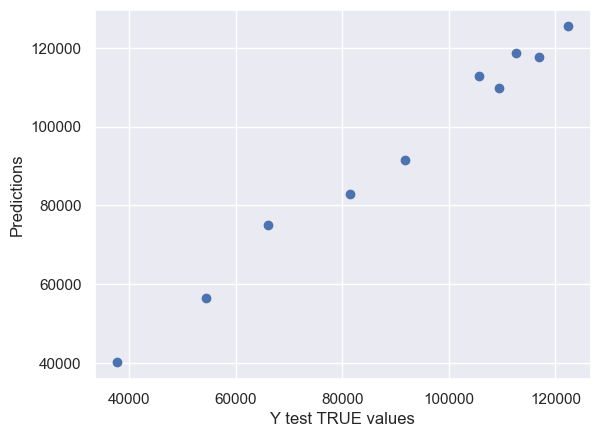

In [24]:
plt.scatter(y_test,y_pred)
plt.xlabel('Y test TRUE values')
plt.ylabel('Predictions')

## Residuals

You should have gotten a very good model with a good fit. Let's quickly explore the residuals to make sure everything was okay with our data. 

**Plot a histogram of the residuals and make sure it looks normally distributed. Use either seaborn distplot, or just plt.hist().**

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

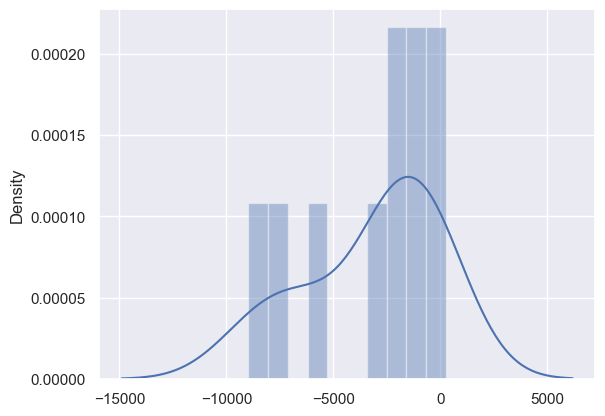

In [25]:
sns.distplot((y_test-y_pred),bins=10)

## Evaluating the Model

Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

** Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error. Refer to the lecture or to Wikipedia for the formulas**

In [26]:
from sklearn import metrics
# calculate these metrics by hand!

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 3249.304483022086
MSE: 19036146.491626855
RMSE: 4363.043260343273


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

Text(0.5, 1.0, 'NO Transformation')

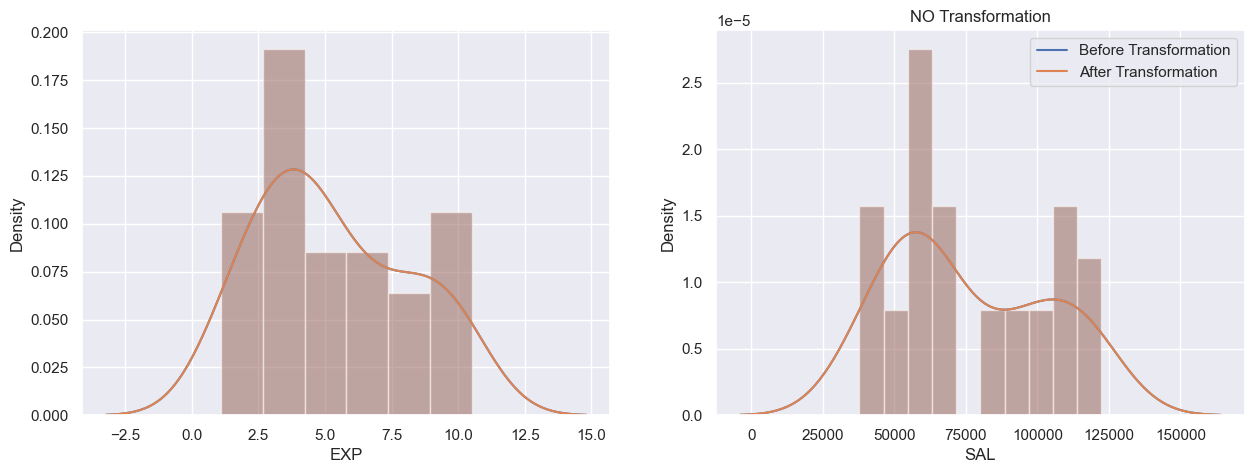

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
plt.title("NO Transformation",loc='center')
sns.distplot(df1['EXP'], bins = 6, kde = True, ax=axes[0])
sns.distplot(df1['EXP'], bins = 6, kde = True, ax=axes[0])

sns.distplot(df1['SAL'], bins = 10, kde = True, ax=axes[1])
sns.distplot(df1['SAL'], bins = 10, kde = True, ax=axes[1])

labels = ['Before Transformation','After Transformation']
plt.legend(labels)
plt.title("NO Transformation",loc='center')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

Text(0.5, 1.0, 'Log Transformation')

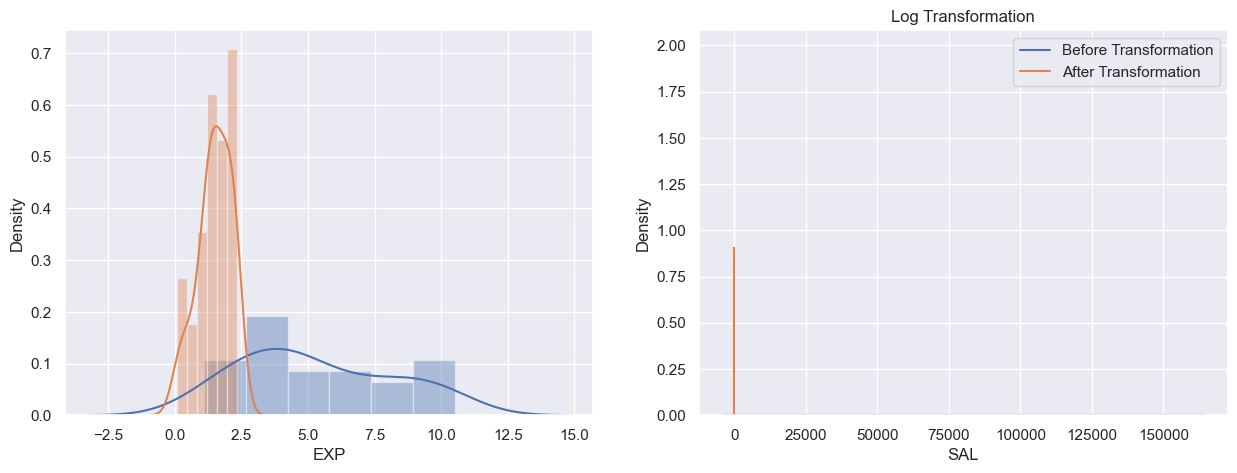

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.distplot(df1['EXP'], bins = 6, kde = True, ax=axes[0])
sns.distplot(np.log(df1['EXP']), bins = 6, kde = True, ax=axes[0])

sns.distplot(df1['SAL'], bins = 10, kde = True, ax=axes[1])
sns.distplot(np.log(df1['SAL']), bins = 10, kde = True, ax=axes[1])

labels = ['Before Transformation','After Transformation']
plt.legend(labels)
plt.title("Log Transformation")

In [30]:
import statsmodels.formula.api as smf
model_reg = smf.ols("EXP~SAL",data = df1).fit()
model_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    EXP   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Thu, 16 Mar 2023   Prob (F-statistic):           1.14e-20
Time:                        22:43:27   Log-Likelihood:                -26.168
No. Observations:                  30   AIC:                             56.34
Df Residuals:                      28   BIC:                             59.14
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.3832      0.327     -7.281      0.000      -3.054      -1.713
SAL            0.0001   4.06e-06     24.950      0.000     9.3e-05       0.000
==============================================================================
Omnibus:                        3.544   Durbin-Watson:                   1.587
Prob(Omnibus):                  0.170   Jarque-Bera (JB):                2.094
Skew:                          -0.412   Prob(JB):                        0.351
Kurtosis:                       2.003   Cond. No.                     2.41e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**The closer the r-squared value is to 1, the better the fit. An r-squared value of 0 indicates that the regression line does not fit the data at all, while an r-squared value of 1 indicates a perfect fit.**